### <i> Forecasting Renewable Energy Trends in the USA An AI-Driven Analysis of Electricity Production by Source</i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/scibearia/electricity-production-by-source </i>
### <i> Import Libray Files </i>

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# Import warnings library
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Your existing code follows here


#### <i> Load the dataset </i>

In [4]:
data = pd.read_csv("Electricity production by source.csv")
data

,Entity,Code,Year,Coal,Gas,Nuclear,Hydro,Solar,Oil,Wind,Bioenergy,Other renewables
0,Afghanistan,AFG,2000,0.00,0.0,0.0,0.31,0.0,0.17,0.0,0.0,0.0
1,Afghanistan,AFG,2001,0.04,0.0,0.0,0.50,0.0,0.15,0.0,0.0,0.0
2,Afghanistan,AFG,2002,0.04,0.0,0.0,0.56,0.0,0.11,0.0,0.0,0.0
3,Afghanistan,AFG,2003,0.09,0.0,0.0,0.63,0.0,0.19,0.0,0.0,0.0
4,Afghanistan,AFG,2004,0.06,0.0,0.0,0.56,0.0,0.17,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8258,Zimbabwe,ZWE,1996,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8259,Zimbabwe,ZWE,1997,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8260,Zimbabwe,ZWE,1998,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8261,Zimbabwe,ZWE,1999,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### <i> Dataset Overview And Statistics </i>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            8263 non-null   object 
 1   Code              8263 non-null   object 
 2   Year              8263 non-null   int64  
 3   Coal              5692 non-null   float64
 4   Gas               5626 non-null   float64
 5   Nuclear           8156 non-null   float64
 6   Hydro             7462 non-null   float64
 7   Solar             6668 non-null   float64
 8   Oil               5736 non-null   float64
 9   Wind              6697 non-null   float64
 10  Bioenergy         5317 non-null   float64
 11  Other renewables  4753 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 774.8+ KB


In [7]:
data.describe()

,Year,Coal,Gas,Nuclear,Hydro,Solar,Oil,Wind,Bioenergy,Other renewables
count,8263.000000,5692.000000,5626.000000,8156.000000,7462.000000,6668.000000,5736.000000,6697.000000,5317.000000,4753.000000
mean,2000.502965,95.788839,50.917572,25.246391,38.828433,2.326702,15.183445,5.190941,3.475960,0.659954
std,15.911960,668.019549,353.908374,181.624466,246.747493,35.940195,98.186891,64.300019,29.208175,5.042745
min,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1989.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.090000,0.000000,0.000000,0.000000
50%,2004.000000,0.000000,0.500000,0.000000,1.630000,0.000000,0.760000,0.000000,0.000000,0.000000
75%,2013.000000,7.622500,14.487500,0.000000,10.430000,0.010000,4.790000,0.020000,0.290000,0.000000
max,2023.000000,10467.930000,6622.930000,2762.240000,4344.050000,1629.900000,1366.022600,2304.440000,678.740000,89.810000


### <i> Data Visulization and Analysis </i>

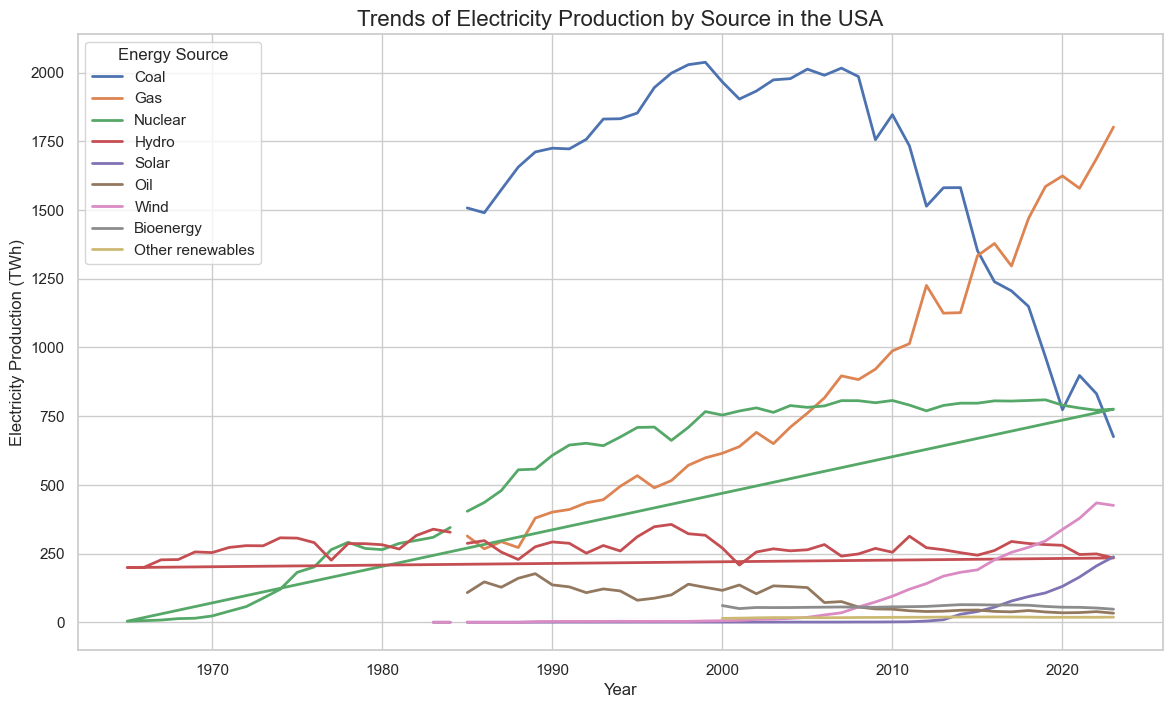

In [9]:
# Filter data for the USA
usa_data = data[data['Entity'] == 'United States']

# Set seaborn theme for professional visuals
sns.set_theme(style="whitegrid")

# Line plot: Trends of each energy source over time in the USA
plt.figure(figsize=(14, 8))
for col in ['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables']:
    plt.plot(usa_data['Year'], usa_data[col], label=col, linewidth=2)

plt.title('Trends of Electricity Production by Source in the USA', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Production (TWh)', fontsize=12)
plt.legend(title='Energy Source')
plt.grid(True)
plt.show()


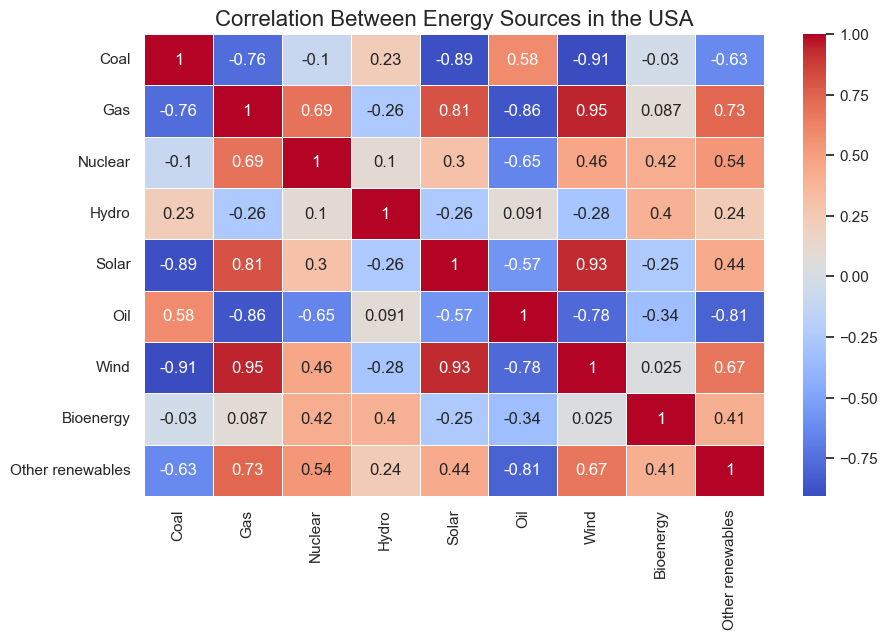

In [10]:
# Heatmap: Correlation between energy sources
plt.figure(figsize=(10, 6))
corr = usa_data[['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Energy Sources in the USA', fontsize=16)
plt.show()

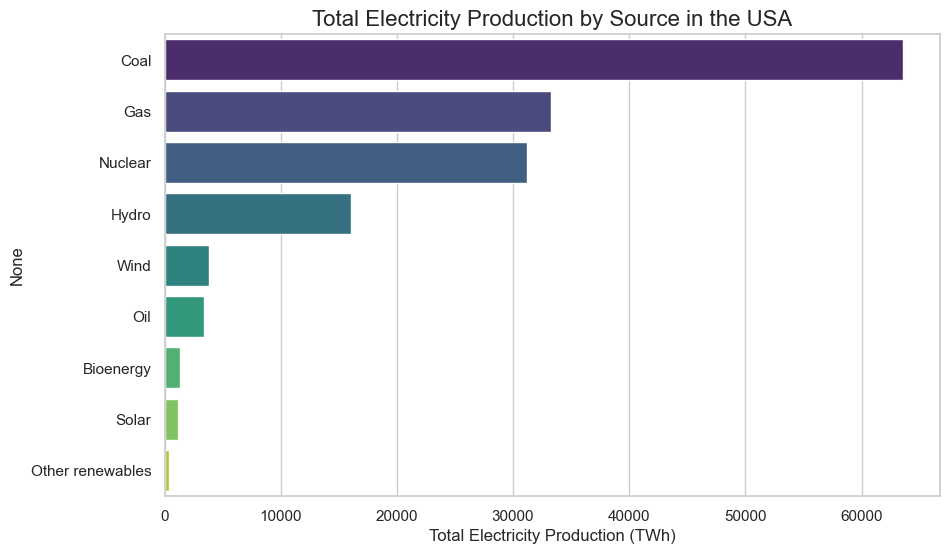

In [11]:
# Bar plot: Total energy production by source over all years in the USA
total_by_source = usa_data.drop(['Entity', 'Code', 'Year'], axis=1).sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_by_source.values, y=total_by_source.index, palette='viridis')
plt.title('Total Electricity Production by Source in the USA', fontsize=16)
plt.xlabel('Total Electricity Production (TWh)', fontsize=12)
plt.show()


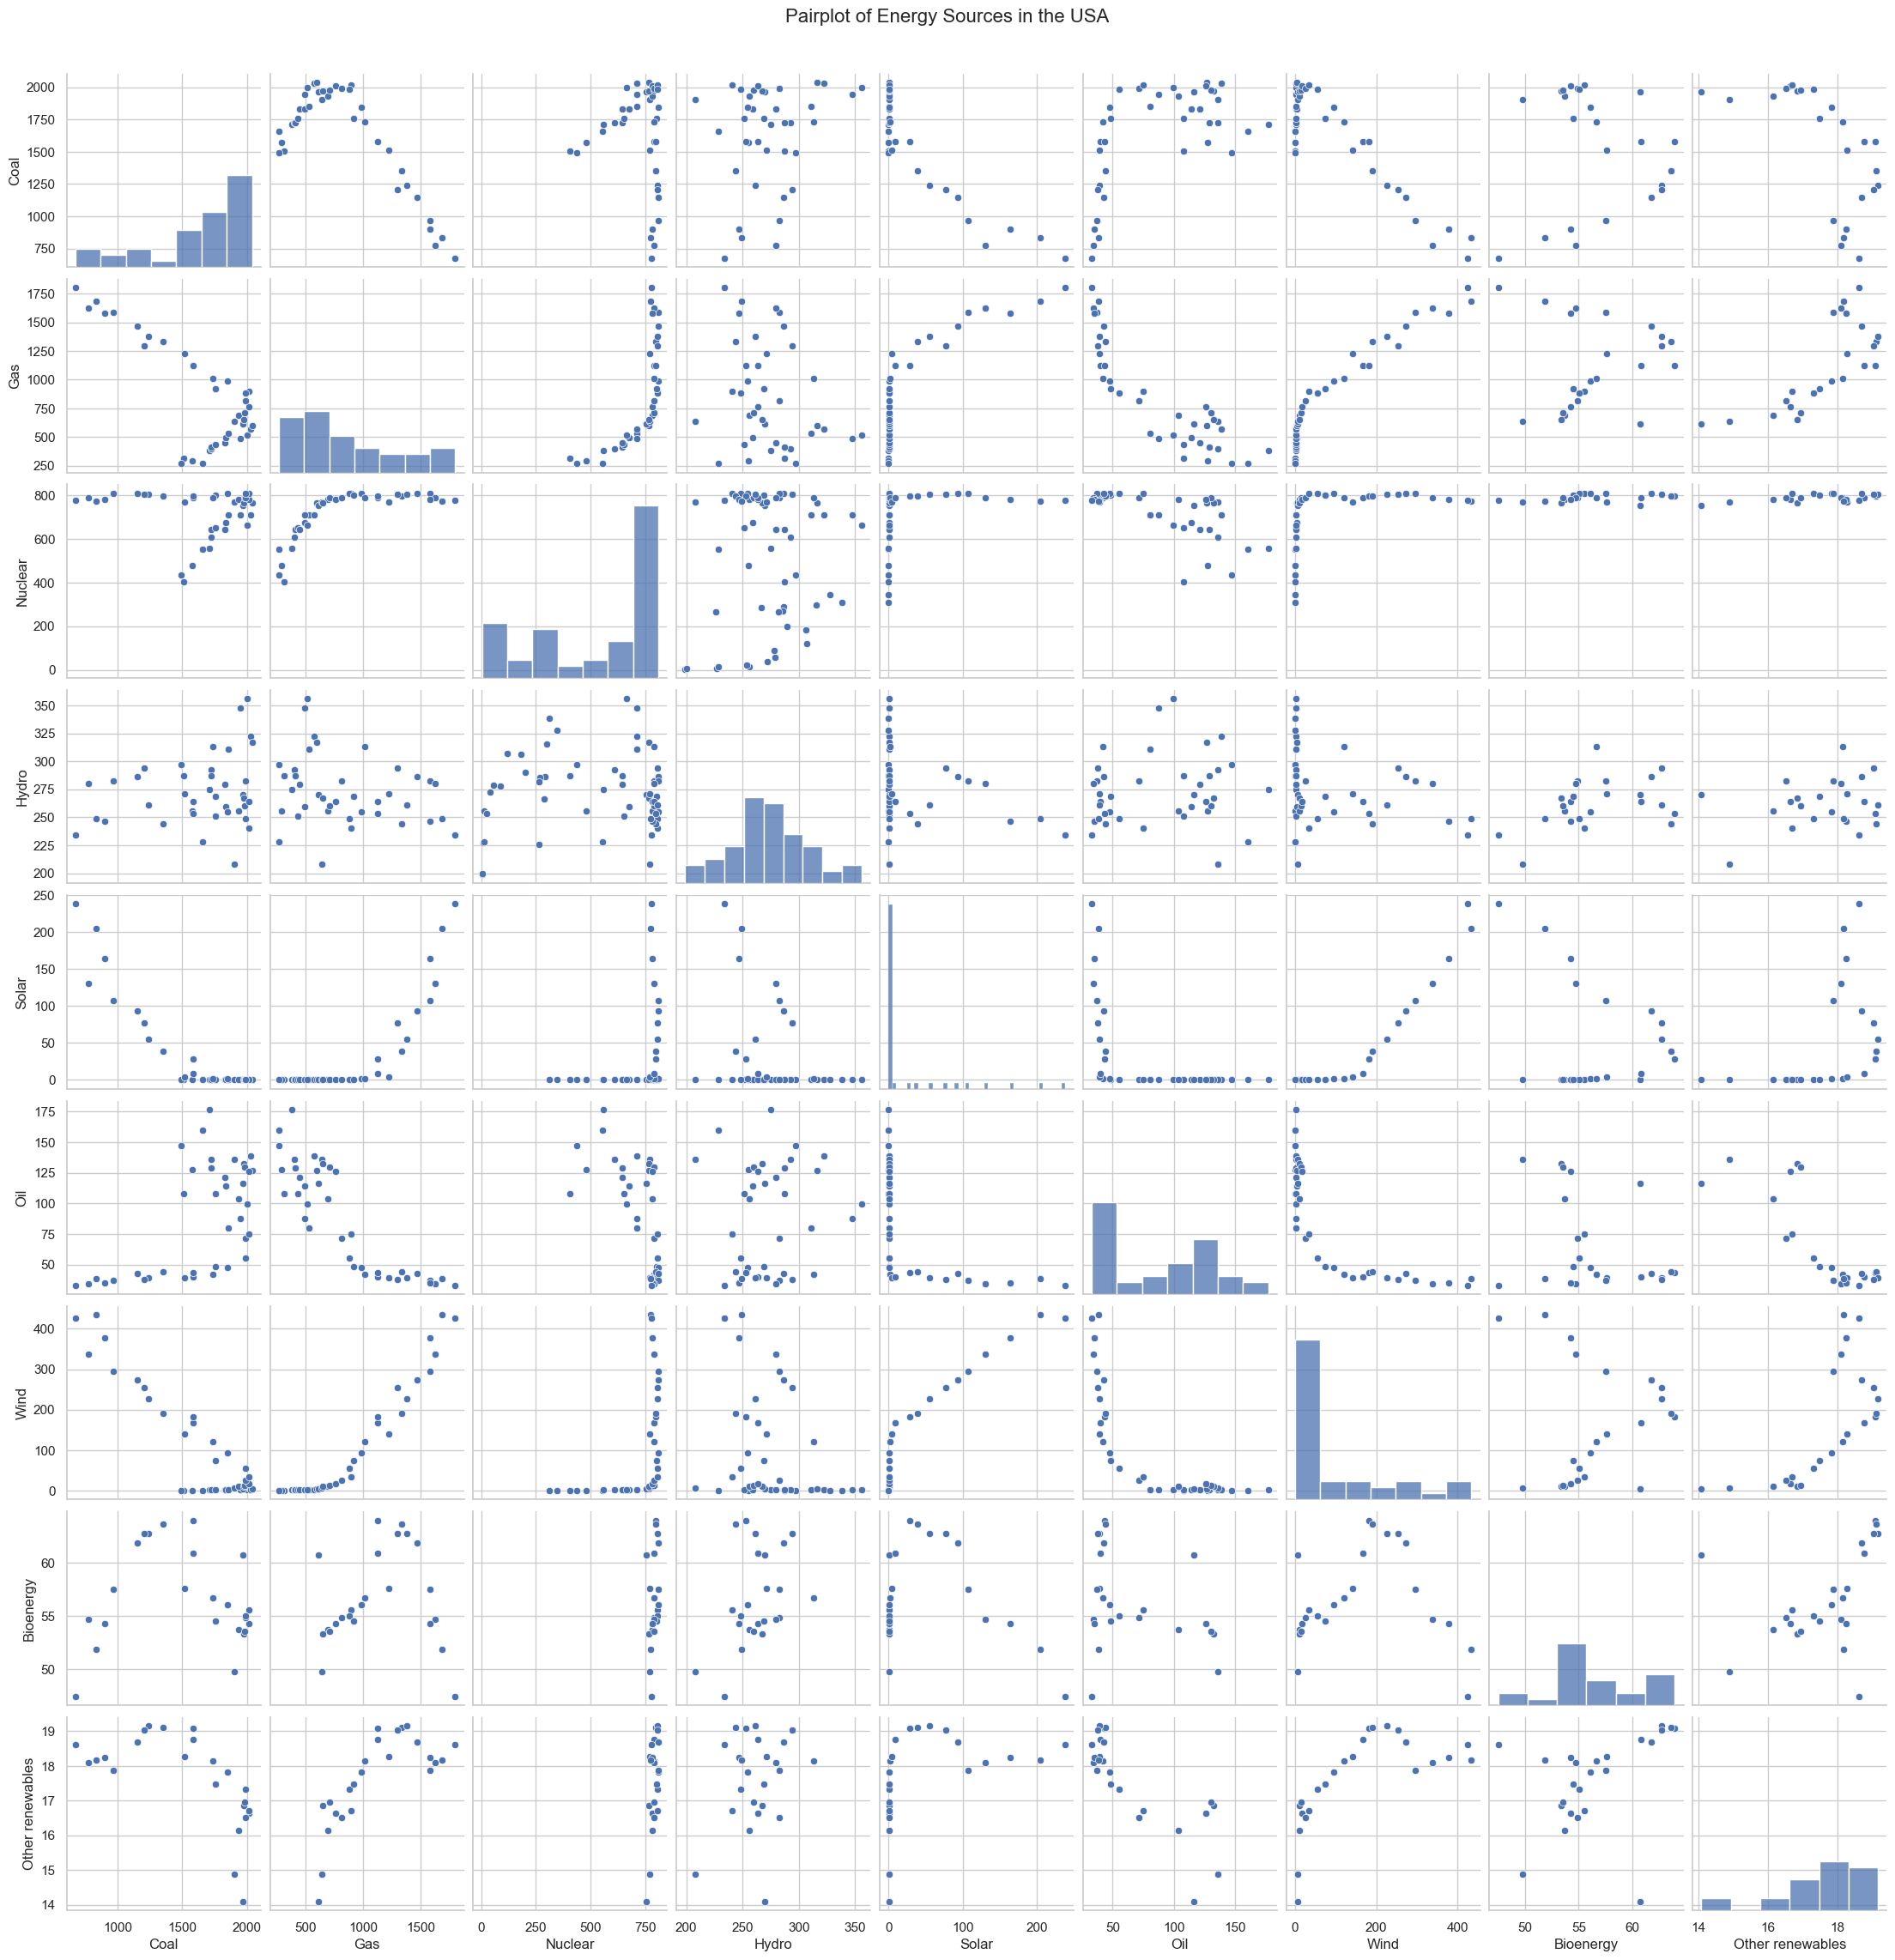

In [12]:
# Pairplot: Relationships between energy sources
sns.pairplot(usa_data[['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables']])
plt.suptitle('Pairplot of Energy Sources in the USA', y=1.02, fontsize=16)
plt.show()


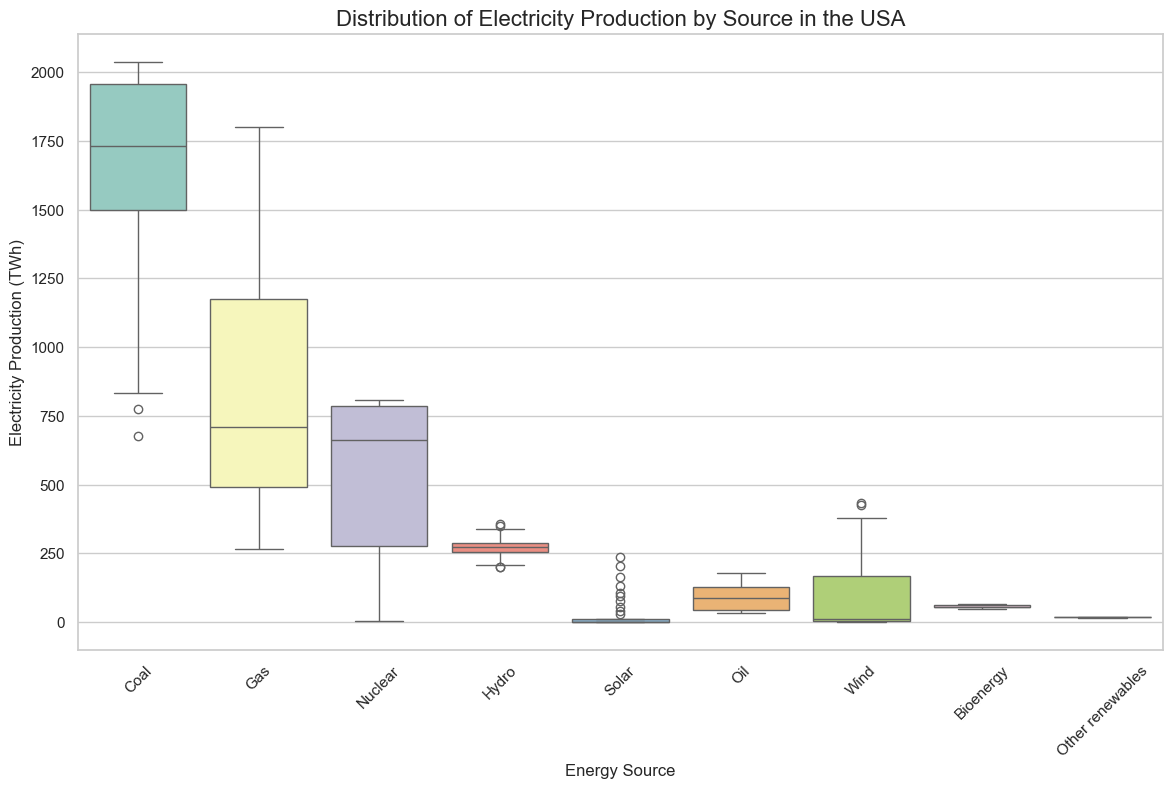

In [13]:
# Boxplot: Distribution of energy production per source over the years
plt.figure(figsize=(14, 8))
sns.boxplot(data=usa_data[['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables']], palette='Set3')
plt.title('Distribution of Electricity Production by Source in the USA', fontsize=16)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Electricity Production (TWh)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

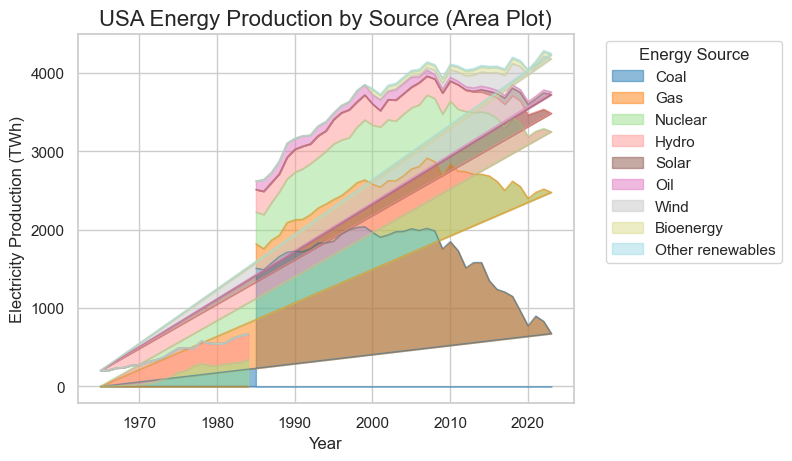

In [14]:
# Filter USA data and a few other major countries for comparison
countries_of_interest = ['United States', 'China', 'India', 'Germany', 'Brazil']
filtered_data = data[data['Entity'].isin(countries_of_interest)]

# Set seaborn theme for professional visuals
sns.set_theme(style="whitegrid")

# Unique Visualization 1: Area Plot for USA Energy Trends
usa_data = data[data['Entity'] == 'United States'].set_index('Year')
plt.figure(figsize=(14, 8))
usa_data[['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables']].plot.area(alpha=0.5, cmap='tab20', linewidth=1)
plt.title('USA Energy Production by Source (Area Plot)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Production (TWh)', fontsize=12)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

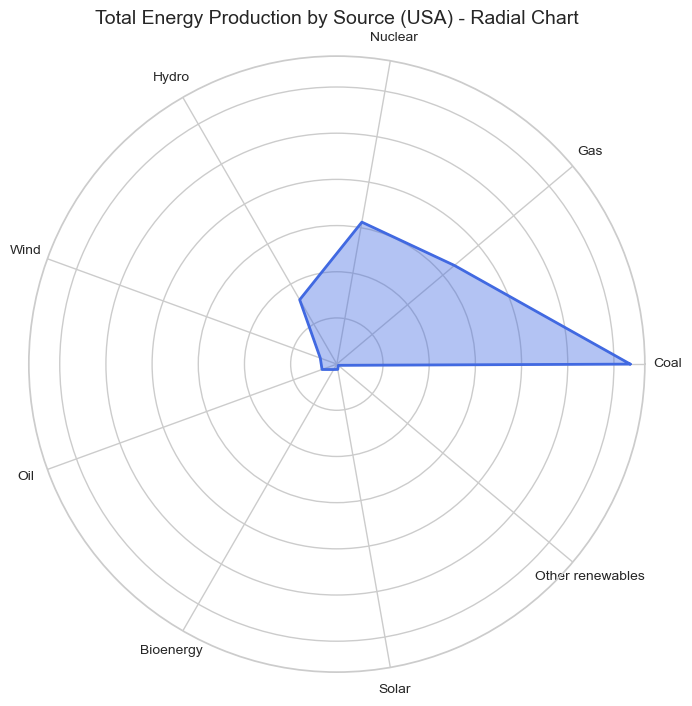

In [15]:
# Unique Visualization 2: Radial Bar Chart for Total Energy Production by Source in the USA
total_by_source = usa_data.drop(['Entity', 'Code'], axis=1).sum().sort_values(ascending=False)
angles = [n / float(len(total_by_source)) * 2 * 3.14159265 for n in range(len(total_by_source))]
angles += angles[:1]
values = total_by_source.values.tolist()
values += values[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='royalblue', alpha=0.4)
ax.plot(angles, values, color='royalblue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(total_by_source.index, fontsize=10)
ax.set_title('Total Energy Production by Source (USA) - Radial Chart', fontsize=14)
plt.show()

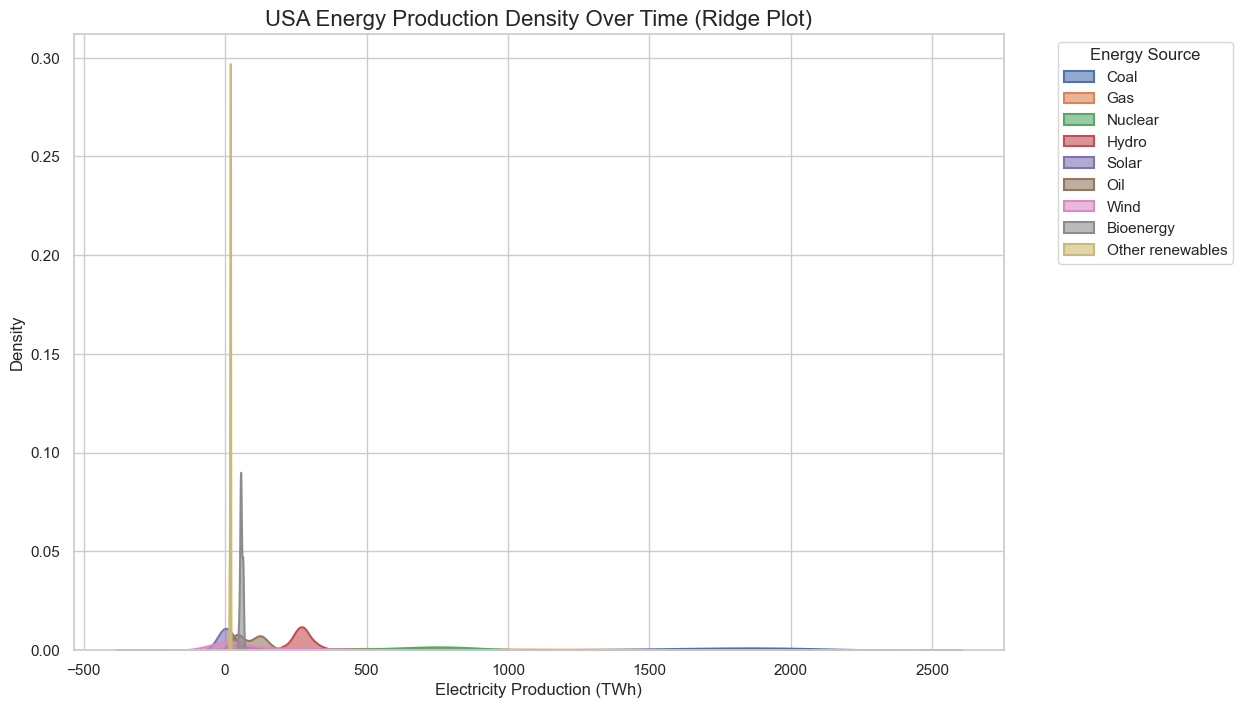

In [16]:
# Unique Visualization 3: Ridge Plot (USA Energy Production Over Time)
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables']):
    sns.kdeplot(usa_data[col], fill=True, label=col, alpha=0.6, linewidth=1.5)
plt.title('USA Energy Production Density Over Time (Ridge Plot)', fontsize=16)
plt.xlabel('Electricity Production (TWh)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

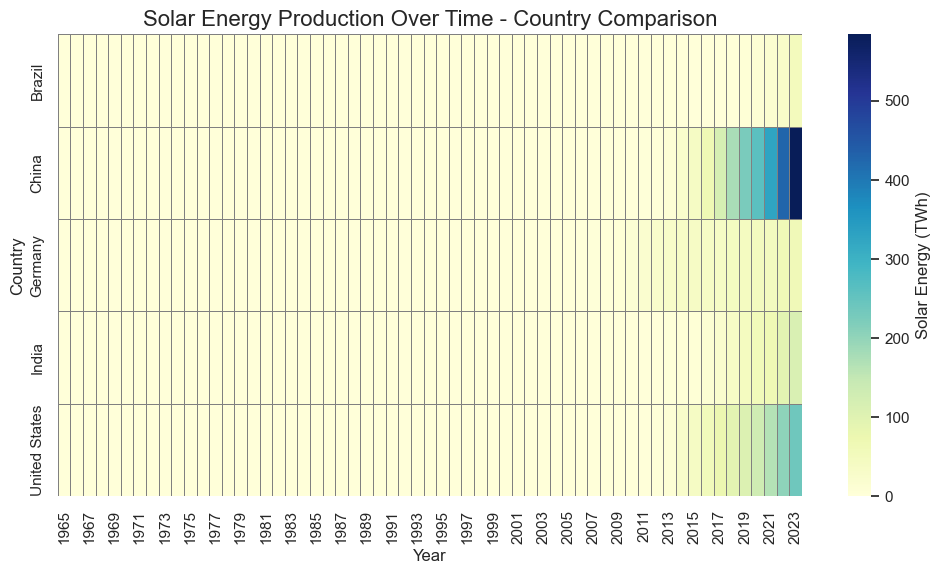

In [17]:
# Unique Visualization 4: Energy Source Comparison Across Countries (Heatmap)
pivot = filtered_data.pivot_table(index='Entity', columns='Year', values='Solar', aggfunc='sum').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Solar Energy (TWh)'})
plt.title('Solar Energy Production Over Time - Country Comparison', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

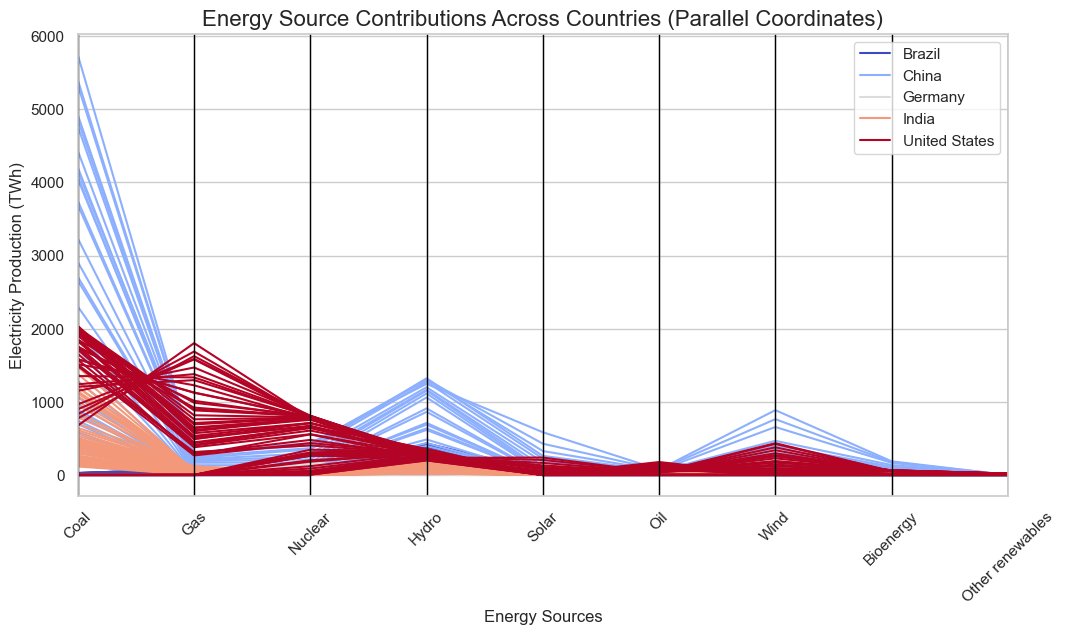

In [18]:
# Unique Visualization 5: Parallel Coordinates Plot (Country Comparison)
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(filtered_data.fillna(0), class_column='Entity', cols=['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables'], colormap='coolwarm')
plt.title('Energy Source Contributions Across Countries (Parallel Coordinates)', fontsize=16)
plt.xlabel('Energy Sources', fontsize=12)
plt.ylabel('Electricity Production (TWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### <i> Data Preprocessing </i>

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Drop rows with missing 'Entity', 'Code', and 'Year' as they are crucial identifiers
data = data.dropna(subset=['Entity', 'Code', 'Year'])

# Fill missing values for energy sources with 0, assuming missing means no production
energy_columns = ['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar', 'Oil', 'Wind', 'Bioenergy', 'Other renewables']
data[energy_columns] = data[energy_columns].fillna(0)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Entity'] = label_encoder.fit_transform(data['Entity'])
data['Code'] = label_encoder.fit_transform(data['Code'])

# Feature scaling (Optional: Only apply if needed for models like SVM, KNN, etc.)
scaler = StandardScaler()
data[energy_columns] = scaler.fit_transform(data[energy_columns])

# Define features (X) and target (y) - Example target: classify based on dominant energy source
# Here, I'm creating a target column that assigns the dominant energy source per year
data['Dominant_Source'] = data[energy_columns].idxmax(axis=1)
target = 'Dominant_Source'

# Splitting the dataset into train and test sets (80% train, 20% test)
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show dataset shapes
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')
print(f'Class distribution in training set:\n{y_train.value_counts()}')



print("Data preprocessing complete and ready for classification modeling!")


Training set shape: (6610, 12)
Test set shape: (1653, 12)
Class distribution in training set:
Dominant_Source
Solar               4293
Oil                  479
Hydro                449
Gas                  384
Nuclear              277
Other renewables     236
Coal                 186
Bioenergy            182
Wind                 124
Name: count, dtype: int64
Data preprocessing complete and ready for classification modeling!


### <i> Modeling </i>
### <i> Random Forest </i>

In [22]:
# Random Forest Classifier with Hyperparameter Tuning
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.9812462189957653
                  precision    recall  f1-score   support

       Bioenergy       1.00      0.87      0.93        45
            Coal       0.98      0.96      0.97        46
             Gas       0.93      0.96      0.94        96
           Hydro       0.97      0.99      0.98       113
         Nuclear       0.91      0.93      0.92        69
             Oil       0.96      0.96      0.96       120
Other renewables       0.97      0.98      0.97        59
           Solar       1.00      0.99      1.00      1074
            Wind       0.86      0.97      0.91        31

        accuracy                           0.98      1653
       macro avg       0.95      0.96      0.95      1653
    weighted avg       0.98      0.98      0.98      1653



### <i> SVM </i>

In [24]:
# SVM Classifier with Randomized Search

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Randomized Search parameters
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42)
random_search = RandomizedSearchCV(svm, param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model
best_svm = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate model
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)
print(classification_report(y_test, y_pred))




Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
SVM Accuracy: 0.9552329098608591
                  precision    recall  f1-score   support

       Bioenergy       0.93      0.82      0.87        45
            Coal       0.92      0.96      0.94        46
             Gas       0.92      0.93      0.92        96
           Hydro       0.94      0.95      0.94       113
         Nuclear       0.86      0.91      0.89        69
             Oil       0.88      0.88      0.88       120
Other renewables       0.91      0.98      0.94        59
           Solar       0.98      0.97      0.98      1074
            Wind       0.83      0.94      0.88        31

        accuracy                           0.96      1653
       macro avg       0.91      0.93      0.92      1653
    weighted avg       0.96      0.96      0.96      1653



### <i> Gradient Boosting Classifier </i>

In [26]:
# Gradient Boosting Classifier with Randomized Search

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Randomized Search parameters (reduced grid)
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(gb, param_dist, n_iter=15, cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best model
best_gb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate model
y_pred = best_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Accuracy:", accuracy)
print(classification_report(y_test, y_pred))




Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}
Gradient Boosting Accuracy: 0.9770114942528736
                  precision    recall  f1-score   support

       Bioenergy       0.95      0.91      0.93        45
            Coal       0.95      0.91      0.93        46
             Gas       0.92      0.92      0.92        96
           Hydro       0.99      0.98      0.99       113
         Nuclear       0.93      0.96      0.94        69
             Oil       0.97      0.97      0.97       120
Other renewables       0.95      0.98      0.97        59
           Solar       0.99      0.99      0.99      1074
            Wind       0.84      0.84      0.84        31

        accuracy                           0.98      1653
       macro avg       0.94      0.94      0.94      1653
    weighted avg       0.98      0.98      0.98      1653



### <i> Comparision Of Models </i>

=== Random Forest Classification Report ===
                  precision    recall  f1-score   support

       Bioenergy       1.00      0.87      0.93        45
            Coal       0.98      0.96      0.97        46
             Gas       0.93      0.96      0.94        96
           Hydro       0.97      0.99      0.98       113
         Nuclear       0.91      0.93      0.92        69
             Oil       0.96      0.96      0.96       120
Other renewables       0.97      0.98      0.97        59
           Solar       1.00      0.99      1.00      1074
            Wind       0.86      0.97      0.91        31

        accuracy                           0.98      1653
       macro avg       0.95      0.96      0.95      1653
    weighted avg       0.98      0.98      0.98      1653



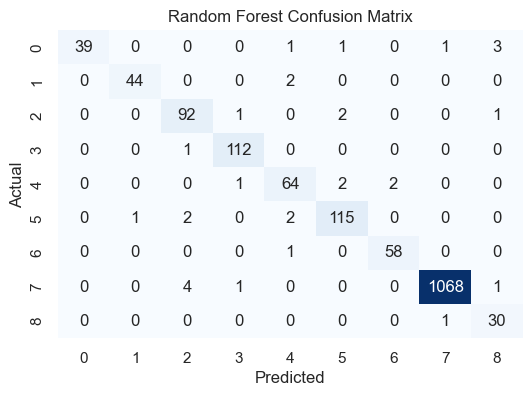

=== SVM Classification Report ===
                  precision    recall  f1-score   support

       Bioenergy       0.93      0.82      0.87        45
            Coal       0.92      0.96      0.94        46
             Gas       0.92      0.93      0.92        96
           Hydro       0.94      0.95      0.94       113
         Nuclear       0.86      0.91      0.89        69
             Oil       0.88      0.88      0.88       120
Other renewables       0.91      0.98      0.94        59
           Solar       0.98      0.97      0.98      1074
            Wind       0.83      0.94      0.88        31

        accuracy                           0.96      1653
       macro avg       0.91      0.93      0.92      1653
    weighted avg       0.96      0.96      0.96      1653



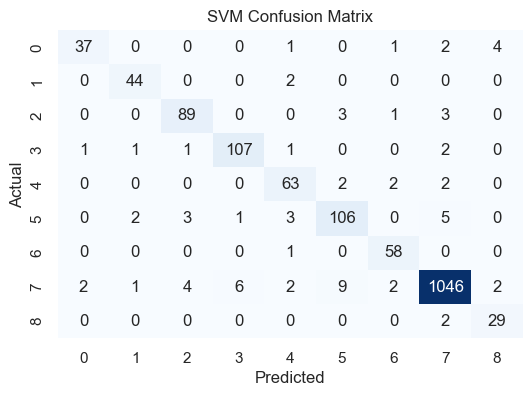

=== Gradient Boosting Classification Report ===
                  precision    recall  f1-score   support

       Bioenergy       0.95      0.91      0.93        45
            Coal       0.95      0.91      0.93        46
             Gas       0.92      0.92      0.92        96
           Hydro       0.99      0.98      0.99       113
         Nuclear       0.93      0.96      0.94        69
             Oil       0.97      0.97      0.97       120
Other renewables       0.95      0.98      0.97        59
           Solar       0.99      0.99      0.99      1074
            Wind       0.84      0.84      0.84        31

        accuracy                           0.98      1653
       macro avg       0.94      0.94      0.94      1653
    weighted avg       0.98      0.98      0.98      1653



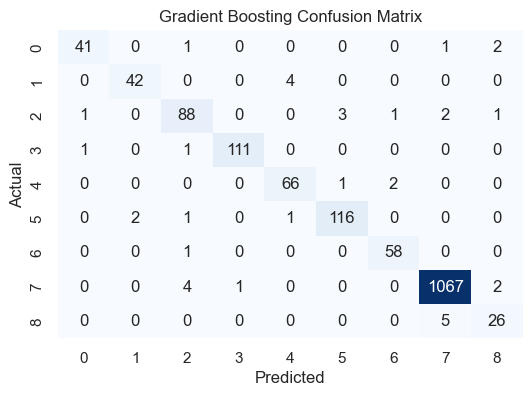

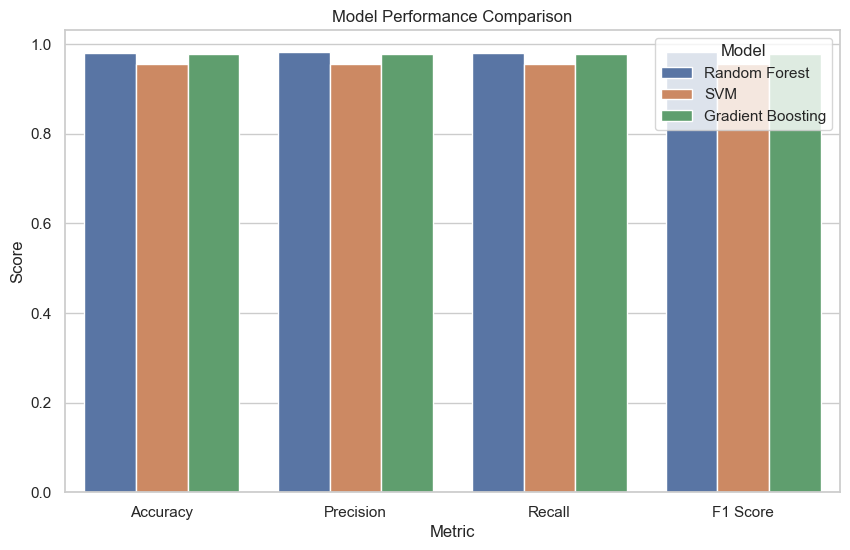

=== Model Comparison Results ===
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.981246   0.981806  0.981246  0.981305
1                SVM  0.955233   0.956114  0.955233  0.955411
2  Gradient Boosting  0.977011   0.977044  0.977011  0.976983


In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Store models and names
models = {
    'Random Forest': best_rf,
    'SVM': best_svm,
    'Gradient Boosting': best_gb
}

# Initialize results list
results = []

# Evaluate models
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Print classification report
    print(f"=== {model_name} Classification Report ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize model comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

# Print the comparison table
print("=== Model Comparison Results ===")
print(results_df)
